In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter

In [2]:
df = pd.read_csv('review3.csv')

df.head()

,name,helpful,comment
0,나,0,이거 지혼자 삭제되는데?
1,나,0,요즘 한달여간 상대방 톡이 오지도 않고 내가 보낸 톡도 상대가 읽었는데 안읽었는데 ...
2,나,0,왜 로그인 가입 둘다 안되나요? 계속 인증도 안된다고 하고
3,나,0,요즘 전송 실패가 잦아요 그리구 메시지 왔다는 알림은 오는데 실제 메시지를 받는건 ...
4,나,0,모르고 지웠으면 아이디 저장됬던거 싹다 지워짐 정말 불편함... ㅡㅡ


In [3]:
df['name'] = df['name'].str.strip()
df['comment'] = df['comment'].str.strip()
df['name'].replace('', np.nan, inplace=True)
df['comment'].replace('', np.nan, inplace=True)
df = df.dropna()

df.head()

,name,helpful,comment
0,나,0,이거 지혼자 삭제되는데?
1,나,0,요즘 한달여간 상대방 톡이 오지도 않고 내가 보낸 톡도 상대가 읽었는데 안읽었는데 ...
2,나,0,왜 로그인 가입 둘다 안되나요? 계속 인증도 안된다고 하고
3,나,0,요즘 전송 실패가 잦아요 그리구 메시지 왔다는 알림은 오는데 실제 메시지를 받는건 ...
4,나,0,모르고 지웠으면 아이디 저장됬던거 싹다 지워짐 정말 불편함... ㅡㅡ


In [4]:
extractor = Hannanum()

nouns = []

for i, row in tqdm(df.iterrows()):
    name, helpful, comment = row

    if name and type(name) is str:
        nouns.extend(extractor.nouns(name))
    if comment and type(comment) is str:
        nouns.extend(extractor.nouns(comment))

486it [00:03, 122.19it/s]


In [5]:
count = Counter(nouns)
words = dict(count.most_common())
print(words)

{'나': 504, '것': 75, '라': 59, '수': 43, '사용': 43, '라인': 42, '기능': 41, '앱': 35, '메세지': 34, '업데이트': 32, '오류': 28, '비밀번호': 28, '때': 27, '저': 26, '해시태그': 25, '태그': 25, '로그인': 24, '메시지': 23, '비번': 23, '뭐': 22, '일시적': 22, '메일': 21, '이거': 20, '진짜': 20, '인증': 18, '알람': 18, '사람': 18, '먹통': 17, '친구': 16, '이': 16, '데': 16, '카톡': 15, '계정': 15, '상대방': 14, '로그': 14, '인증기능': 14, '삭제': 13, '전화': 13, '가입': 12, '어플': 12, '검색': 12, '전': 11, 'ㅡㅡ': 11, '설치': 11, '불편': 11, '안': 11, '거': 11, '이상': 11, '문제': 11, 'ㅠㅠ': 10, '폰': 10, '해결': 10, '다운': 10, '이용': 10, '전송': 9, '접속': 9, '말': 9, '확인': 9, '이유': 9, '망': 9, '후': 9, '대화': 9, '생각': 9, '지': 9, '소리': 9, '유저들': 9, 'ㅜ': 8, '변경': 8, '데이터': 8, '유저': 8, '리': 8, '작년': 8, '이후': 8, '문자': 7, '이메일': 7, '안와요': 7, '네이버': 7, '업뎃': 7, '예전': 7, '안보': 7, '자체': 7, '영상통화': 7, '친구추': 7, '톡': 6, '아이': 6, 'ㅋㅋ': 6, '이메': 6, '사진': 6, '전화번호': 6, '안오': 6, '하나': 6, '뒤': 6, '경우': 6, '카카오': 6, '통화': 6, '휴대폰': 6, '현상': 6, '개': 6, '번호': 6, '퇴화': 6, '입력': 6, '불편함': 5, '반복': 5, '쓰레기': 5, '안되요

In [6]:

for word in list(words.keys()):
    if len(word) == 1:
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]
        
print(words)

{'사용': 43, '라인': 42, '기능': 41, '메세지': 34, '업데이트': 32, '오류': 28, '비밀번호': 28, '해시태그': 25, '태그': 25, '로그인': 24, '메시지': 23, '비번': 23, '일시적': 22, '메일': 21, '이거': 20, '진짜': 20, '인증': 18, '알람': 18, '사람': 18, '먹통': 17, '친구': 16, '카톡': 15, '계정': 15, '상대방': 14, '로그': 14, '인증기능': 14, '삭제': 13, '전화': 13, '가입': 12, '어플': 12, '검색': 12, 'ㅡㅡ': 11, '설치': 11, '불편': 11, '이상': 11, '문제': 11, 'ㅠㅠ': 10, '해결': 10, '다운': 10, '이용': 10, '전송': 9, '접속': 9, '확인': 9, '이유': 9, '대화': 9, '생각': 9, '소리': 9, '유저들': 9, '변경': 8, '데이터': 8, '유저': 8, '작년': 8, '이후': 8, '문자': 7, '이메일': 7, '안와요': 7, '네이버': 7, '업뎃': 7, '예전': 7, '안보': 7, '자체': 7, '영상통화': 7, '친구추': 7, '아이': 6, 'ㅋㅋ': 6, '이메': 6, '사진': 6, '전화번호': 6, '안오': 6, '하나': 6, '경우': 6, '카카오': 6, '통화': 6, '휴대폰': 6, '현상': 6, '번호': 6, '퇴화': 6, '입력': 6, '불편함': 5, '반복': 5, '쓰레기': 5, '안되요': 5, '추가': 5, '근데': 5, '연결': 5, '안오네요': 5, '내용': 5, '일본': 5, '사람들': 5, '수정': 5, '네트워크': 5, '핸드폰': 5, '정상적': 5, '저장': 5, '아이디': 5, '인증번호': 5, '기능들': 5, '상대': 4, '화면': 4, '로그아웃': 4, '최악': 4, '연락': 4, 

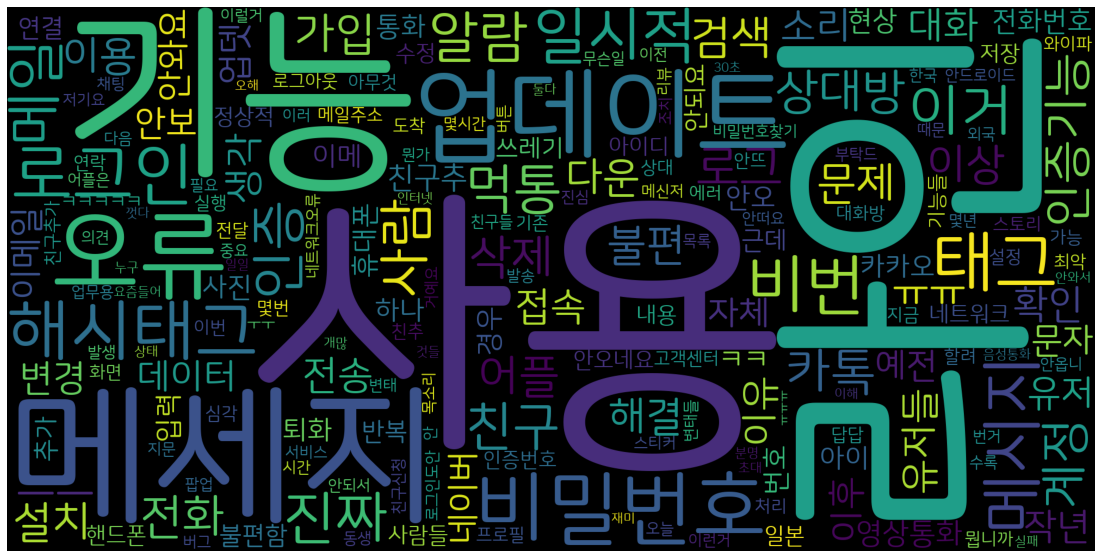

In [7]:
wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()